In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


REAL = "Real"
FAKE = "Fake"

true_df = pd.read_csv("../datasets/True.csv")
fake_df = pd.read_csv("../datasets/Fake.csv")


In [42]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [43]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [44]:
true_df["target"] = REAL
fake_df["target"] = FAKE

complete_df = pd.concat([true_df, fake_df], ignore_index=True)
complete_df = complete_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(complete_df.shape)
complete_df.head(10)

(44898, 5)


,title,text,subject,date,target
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",Fake
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",Fake
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",Fake
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",Real
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",Fake
5,"As private lawyer, Trump high court pick was f...",WASHINGTON (Reuters) - As a lawyer in private ...,politicsNews,"February 1, 2017",Real
6,Yemeni Salafist imam killed in Aden: sources,ADEN (Reuters) - A Salafist imam was shot dead...,worldnews,"October 28, 2017",Real
7,FBI says witnesses in U.S. probe into Malaysia...,KUALA LUMPUR (Reuters) - Potential witnesses t...,worldnews,"September 6, 2017",Real
8,An Easy To Read Chart Shows How Bernie Sanders...,The goal of socialism is communism. -Vladimi...,politics,"Feb 24, 2016",Fake
9,MMA FIGHTER JAKE SHIELDS Embarrasses Cowards I...,Opposing views and beliefs has much of this co...,politics,"Feb 4, 2017",Fake


In [45]:
complete_df.describe()

,title,text,subject,date,target
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake
freq,14,627,11272,182,23481


# Removing duplicates news based on title and text columns

In [46]:
duplicates_count = complete_df[["title", "text"]].duplicated().sum()
print(f"Number of duplicate news based on title and text columns: {duplicates_count}")
complete_df = complete_df.drop_duplicates(subset=["title", "text"])
duplicates_count = complete_df[["title", "text"]].duplicated().sum()
print(f"Number of duplicate news based on title and text columns after removal: {duplicates_count}")

Number of duplicate news based on title and text columns: 5793
Number of duplicate news based on title and text columns after removal: 0


<Axes: xlabel='target', ylabel='count'>

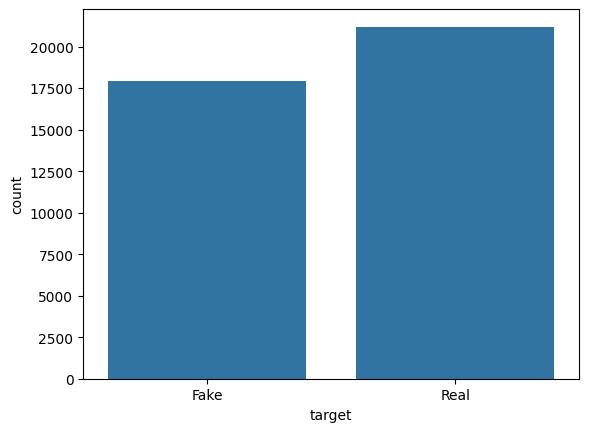

In [50]:
sns.countplot(data=complete_df, x='target')

# Removing punctuation

In [48]:
import string


def remove_punctuation(text: str) -> str:
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

In [49]:
complete_df["text"] = complete_df["text"].apply(remove_punctuation)
complete_df["title"] = complete_df["title"].apply(remove_punctuation)

complete_df.head(10)

,title,text,subject,date,target
0,BREAKING GOP Chairman Grassley Has Had Enough...,Donald Trump s White House is in chaos and the...,News,"July 21, 2017",Fake
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",Fake
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe He supports exg...,News,"December 3, 2016",Fake
3,California AG pledges to defend birth control ...,SAN FRANCISCO Reuters California Attorney Gen...,politicsNews,"October 6, 2017",Real
4,AZ RANCHERS Living On USMexico Border Destroy ...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",Fake
5,As private lawyer Trump high court pick was fr...,WASHINGTON Reuters As a lawyer in private pra...,politicsNews,"February 1, 2017",Real
6,Yemeni Salafist imam killed in Aden sources,ADEN Reuters A Salafist imam was shot dead by...,worldnews,"October 28, 2017",Real
7,FBI says witnesses in US probe into Malaysias ...,KUALA LUMPUR Reuters Potential witnesses to t...,worldnews,"September 6, 2017",Real
8,An Easy To Read Chart Shows How Bernie Sanders...,The goal of socialism is communism Vladimir ...,politics,"Feb 24, 2016",Fake
9,MMA FIGHTER JAKE SHIELDS Embarrasses Cowards I...,Opposing views and beliefs has much of this co...,politics,"Feb 4, 2017",Fake
